In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('iris.csv')

In [4]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['species'])
trans = le.transform(df['species'])
df['species'] = trans
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
features = df.iloc[:,0:4]
labels = np.array(df['species'])
np.shape(features)
np.shape(labels)

(150,)

In [6]:
labels = np.array(df['species'])
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
labels = labels.reshape(-1, 1)

In [8]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
targets = encoder.fit_transform(labels).toarray()

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(features)
scaled_features = scaler.transform(features)

In [10]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam

trainX, testX, trainy, testy = train_test_split(scaled_features, targets, test_size=0.5)

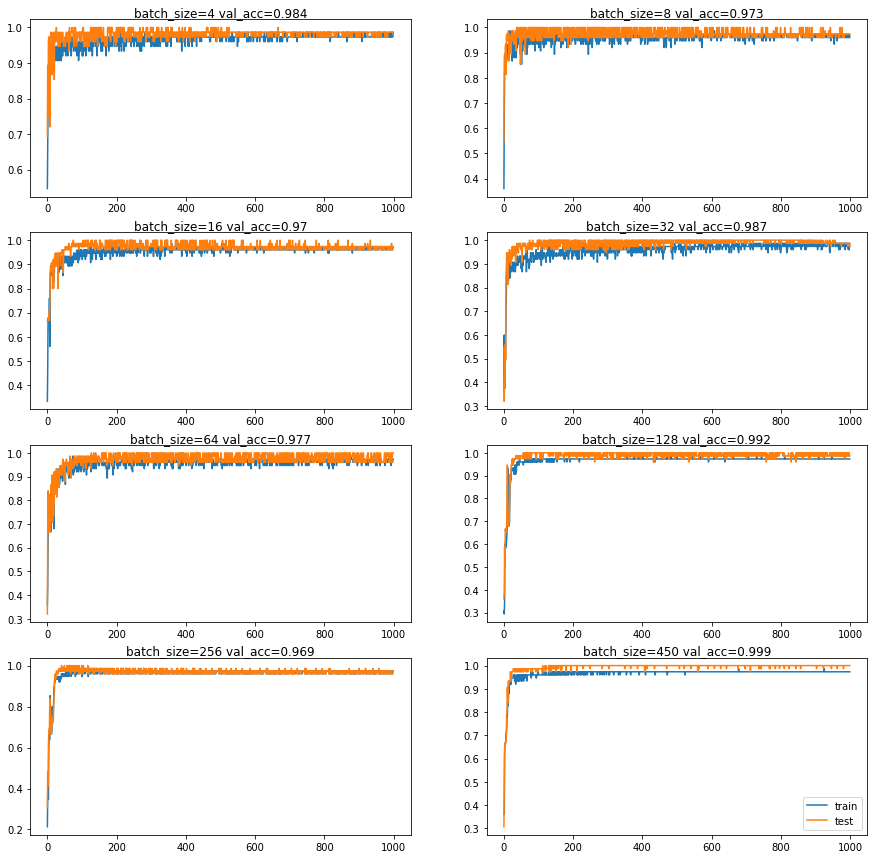

In [17]:
n_layers = 2
n_nodes = 4
optimizer = 'rmsprop'
epochs = 1000
lrate = 1e-2
momentum = 0.75
decay = 1E-3
n_input, n_classes = trainX.shape[1], testy.shape[1]

def fit_model(trainX, trainy, testX, testy, n_batch):
    model = Sequential()
    model.add(Dense(n_nodes, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))
    for l in range(0,n_layers):
        model.add(Dense(n_nodes, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax'))
    opt = RMSprop(lr=lrate, momentum=momentum, decay=decay)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=1000, batch_size=n_batch, verbose=0)
    val_acc = round(np.mean(history.history['val_accuracy'][epochs-51:epochs-1]),3)
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('batch_size='+str(n_batch)+' val_acc='+str(val_acc), pad=-50)

batch_sizes = [4, 8, 16, 32, 64, 128, 256, 450]
plt.figure(figsize=(15,15))
for i in range(len(batch_sizes)):
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    fit_model(trainX, trainy, testX, testy, batch_sizes[i])
plt.legend()
plt.show()